In [21]:
import sys
# Install packages
!pip install category_encoders==2.0.0
!pip install pandas-profiling==2.3.0
!pip install plotly==4.1.1

In [45]:
#Fetch smoking data file
#from google.colab import files
#uploaded = files.upload()

In [1]:
# Load smoking data
import pandas as pd
import io
# df_smoking = pd.read_csv(io.StringIO(uploaded['C:\\Users\\ASG\\Desktop\\cancerxx - for_import.csv'].decode('utf-8')))
df_smoking = pd.read_csv('C:\\Users\\ASG\\Desktop\\cancerxx - for_import.csv')
df_smoking.head()

language  cereal_serve_per_month  cereal_times_per_month  \
0         5                       3                       2   
1         4                       0                       0   
2         5                       5                       2   
3         3                       1                       1   
4         5                       2                       2   

   more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  \
0                        2.0                     3                     2   
1                        NaN                     0                     0   
2                        2.0                     5                     2   
3                        2.0                     4                     3   
4                        1.0                     0                     0   

   milk_type  soda_serve_per_month  soda_times_per_month  \
0        1.0                     4                     3   
1        NaN                     0                     0   
2        4.0                     1                     3   
3        5.0                     3                     2   
4        NaN                     0                     0   

   juice_serve_per_month         ...          crime_discourages_walking  \
0                      4         ...                                  2   
1                      2         ...                                  2   
2                      0         ...                                  2   
3                      1         ...                                  2   
4                      0         ...                                  2   

   animals_discourage_walking  cigarette_even_once  cigar_even_once  \
0                           2                    2                1   
1                           2                    2                2   
2                           2                    2                1   
3                           2                    1                1   
4                           1                    2                2   

   pipe_even_once  smokeless_even_once  had_genetic_counseling  \
0               2                    2                       2   
1               2                    2                       2   
2               2                    2                       2   
3               2                    2                       2   
4               2                    2                       2   

   genetic_counseling_with_MD  genetic_counseling_for_cancer  \
0                           2                              2   
1                           2                              2   
2                           2                              2   
3                           2                              2   
4                           2                              2   

   cigarettes_per_day  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                10.0  

[5 rows x 92 columns]

In [2]:
# We assess the contents of df_smoking
df_smoking_shape = df_smoking.shape
print ('df_smoking Shape')
print (df_smoking_shape, '\n')
print ('df_smoking Count')
print (df_smoking.count(), '\n')
print ('df_smoking NaN Count')
print (df_smoking.isna().sum(), '\n')
print ('df_smoking Describe')
print (df_smoking.describe())

df_smoking Shape
(33672, 92) 

df_smoking Count
language                         33672
cereal_serve_per_month           33672
cereal_times_per_month           33672
more_than_one_cereal_type        22858
milk_serve_per_month             33672
milk_times_per_month             33672
milk_type                        24044
soda_serve_per_month             33672
soda_times_per_month             33672
juice_serve_per_month            33672
juice_times_per_month            33672
coffee_serve_per_month           33672
coffee_times_per_month           33672
sports_drink_serve_per_month     33672
sports_drink_times_per_month     33672
fruit_drink_serve_per_month      33672
fruit_drink_times_per_month      33672
fruit_eat_serve_per_month        33672
fruit_eat_times_per_month        33672
salad_eat_serve_per_month        33672
salad_eat_times_per_month        33672
fries_eat_serve_per_month        33672
fries_eat_times_per_month        33672
potatoe_eat_serve_per_month      33672
potatoe_eat_time

In [3]:
# Replace NaN to improve data format
import numpy as np
df_smoking1 = df_smoking.replace ({np.NaN: 0})
df_smoking1.head()

language  cereal_serve_per_month  cereal_times_per_month  \
0         5                       3                       2   
1         4                       0                       0   
2         5                       5                       2   
3         3                       1                       1   
4         5                       2                       2   

   more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  \
0                        2.0                     3                     2   
1                        0.0                     0                     0   
2                        2.0                     5                     2   
3                        2.0                     4                     3   
4                        1.0                     0                     0   

   milk_type  soda_serve_per_month  soda_times_per_month  \
0        1.0                     4                     3   
1        0.0                     0                     0   
2        4.0                     1                     3   
3        5.0                     3                     2   
4        0.0                     0                     0   

   juice_serve_per_month         ...          crime_discourages_walking  \
0                      4         ...                                  2   
1                      2         ...                                  2   
2                      0         ...                                  2   
3                      1         ...                                  2   
4                      0         ...                                  2   

   animals_discourage_walking  cigarette_even_once  cigar_even_once  \
0                           2                    2                1   
1                           2                    2                2   
2                           2                    2                1   
3                           2                    1                1   
4                           1                    2                2   

   pipe_even_once  smokeless_even_once  had_genetic_counseling  \
0               2                    2                       2   
1               2                    2                       2   
2               2                    2                       2   
3               2                    2                       2   
4               2                    2                       2   

   genetic_counseling_with_MD  genetic_counseling_for_cancer  \
0                           2                              2   
1                           2                              2   
2                           2                              2   
3                           2                              2   
4                           2                              2   

   cigarettes_per_day  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                10.0  

[5 rows x 92 columns]

In [4]:
# Set up boolean columns such that yes = 1 and no = 0
features1 = {'more_than_one_cereal_type', 'vitamin_past_month', 'multivitamin_past_month', 'calcium_past_month', 'vitD_past_month', 'walk_past_wk', 'walk_leisure_past_wk',
            'walkway_existence', 'walkable_retail', 'walkable_bus_stop', 'walkable_entertainment', 'walkable_relaxation', 'streets_have_walkways', 'traffic_discourages_walking',
            'crime_discourages_walking', 'animals_discourage_walking', 'cigarette_even_once', 'cigar_even_once', 'pipe_even_once', 'smokeless_even_once',
            'had_genetic_counseling', 'genetic_counseling_with_MD', 'genetic_counseling_for_cancer'}

replacements1 = {
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0
}

df_smoking2 = df_smoking1.loc[:, features1].replace(replacements1) 

df_smoking2.head()

genetic_counseling_with_MD  cigar_even_once  pipe_even_once  \
0                           0                1               0   
1                           0                0               0   
2                           0                1               0   
3                           0                1               0   
4                           0                0               0   

   had_genetic_counseling  calcium_past_month  walkway_existence  \
0                       0                 0.0                  1   
1                       0                 1.0                  1   
2                       0                 0.0                  1   
3                       0                 0.0                  1   
4                       0                 0.0                  1   

   walkable_entertainment  more_than_one_cereal_type  walkable_relaxation  \
0                       0                        0.0                    1   
1                       1                        0.0                    1   
2                       1                        0.0                    1   
3                       0                        0.0                    0   
4                       1                        1.0                    0   

   crime_discourages_walking             ...              smokeless_even_once  \
0                          0             ...                                0   
1                          0             ...                                0   
2                          0             ...                                0   
3                          0             ...                                0   
4                          0             ...                                0   

   genetic_counseling_for_cancer  vitamin_past_month  walkable_retail  \
0                              0                   0                1   
1                              0                   1                1   
2                              0                   1                1   
3                              0                   0                1   
4                              0                   1                1   

   streets_have_walkways  vitD_past_month  cigarette_even_once  \
0                      0              0.0                    0   
1                      1              0.0                    0   
2                      1              0.0                    0   
3                      1              0.0                    1   
4                      1              0.0                    0   

   multivitamin_past_month  traffic_discourages_walking  \
0                      0.0                            1   
1                      1.0                            0   
2                      1.0                            0   
3                      0.0                            1   
4                      1.0                            0   

   animals_discourage_walking  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  

[5 rows x 23 columns]

In [5]:
df_smoking1.loc[:,'number'] = df_smoking1.index
df_smoking2.loc[:,'number'] = df_smoking2.index

df_smoking1.loc[df_smoking1.number.isin(df_smoking2.number), features1] = df_smoking2.loc[:,features1]
df_smoking1.head()

language  cereal_serve_per_month  cereal_times_per_month  \
0         5                       3                       2   
1         4                       0                       0   
2         5                       5                       2   
3         3                       1                       1   
4         5                       2                       2   

   more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  \
0                        0.0                     3                     2   
1                        0.0                     0                     0   
2                        0.0                     5                     2   
3                        0.0                     4                     3   
4                        1.0                     0                     0   

   milk_type  soda_serve_per_month  soda_times_per_month  \
0        1.0                     4                     3   
1        0.0                     0                     0   
2        4.0                     1                     3   
3        5.0                     3                     2   
4        0.0                     0                     0   

   juice_serve_per_month   ...    animals_discourage_walking  \
0                      4   ...                             0   
1                      2   ...                             0   
2                      0   ...                             0   
3                      1   ...                             0   
4                      0   ...                             1   

   cigarette_even_once  cigar_even_once  pipe_even_once  smokeless_even_once  \
0                    0                1               0                    0   
1                    0                0               0                    0   
2                    0                1               0                    0   
3                    1                1               0                    0   
4                    0                0               0                    0   

   had_genetic_counseling  genetic_counseling_with_MD  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   genetic_counseling_for_cancer  cigarettes_per_day  number  
0                              0                 0.0       0  
1                              0                 0.0       1  
2                              0                 0.0       2  
3                              0                 0.0       3  
4                              0                10.0       4  

[5 rows x 93 columns]

In [6]:
df_smoking1 = df_smoking1.drop('number', axis = 1)
df_smoking1.head()

language  cereal_serve_per_month  cereal_times_per_month  \
0         5                       3                       2   
1         4                       0                       0   
2         5                       5                       2   
3         3                       1                       1   
4         5                       2                       2   

   more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  \
0                        0.0                     3                     2   
1                        0.0                     0                     0   
2                        0.0                     5                     2   
3                        0.0                     4                     3   
4                        1.0                     0                     0   

   milk_type  soda_serve_per_month  soda_times_per_month  \
0        1.0                     4                     3   
1        0.0                     0                     0   
2        4.0                     1                     3   
3        5.0                     3                     2   
4        0.0                     0                     0   

   juice_serve_per_month         ...          crime_discourages_walking  \
0                      4         ...                                  0   
1                      2         ...                                  0   
2                      0         ...                                  0   
3                      1         ...                                  0   
4                      0         ...                                  0   

   animals_discourage_walking  cigarette_even_once  cigar_even_once  \
0                           0                    0                1   
1                           0                    0                0   
2                           0                    0                1   
3                           0                    1                1   
4                           1                    0                0   

   pipe_even_once  smokeless_even_once  had_genetic_counseling  \
0               0                    0                       0   
1               0                    0                       0   
2               0                    0                       0   
3               0                    0                       0   
4               0                    0                       0   

   genetic_counseling_with_MD  genetic_counseling_for_cancer  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   cigarettes_per_day  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                10.0  

[5 rows x 92 columns]

C:\Users\ASG\.conda\envs\Lambda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


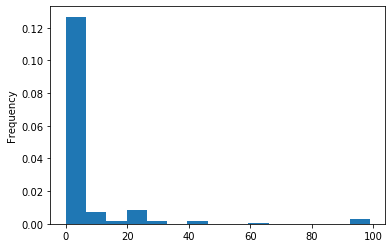

In [7]:
# Freqeuncy plot for cigarettes_per_day
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = df_smoking1['cigarettes_per_day']
plt.hist(df_smoking1['cigarettes_per_day'], normed=True, bins=15)
plt.ylabel('Frequency');

In [8]:
# Drop rows where cigarettes_per_day = 0
df_smoking1['cigarettes_per_day'] =  df_smoking1['cigarettes_per_day'].replace ({np.NaN: 0})
df_smoking1 = df_smoking1[df_smoking1['cigarettes_per_day'] > 0]
df_smoking1.shape

(7602, 92)

C:\Users\ASG\.conda\envs\Lambda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


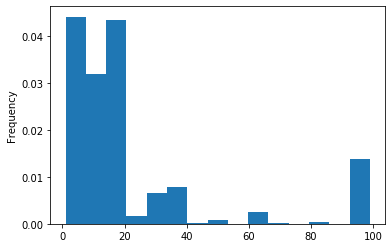

In [9]:
# Create frequency plot of cigarettes per day
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d = df_smoking1['cigarettes_per_day']
plt.hist(df_smoking1['cigarettes_per_day'], normed=True, bins=15)
plt.ylabel('Frequency');

In [10]:
# Create a column in which cigarettes per day are sorted into 8 bins
df_smoking1['cigarettes_per_day_bins'] = pd.cut(x=df_smoking1['cigarettes_per_day'], bins=[0, 7, 14, 21, 28, 35, 42, 49, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8])
df_smoking1 = df_smoking1.drop('cigarettes_per_day', axis = 1)
df_smoking1['cigarettes_per_day_bins'] =  df_smoking1['cigarettes_per_day_bins'].replace ({np.NaN: 0})
df_smoking1.head()

language  cereal_serve_per_month  cereal_times_per_month  \
4          5                       2                       2   
9          1                       3                       2   
11         5                       0                       0   
13         5                       0                       0   
14         2                       0                       0   

    more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  \
4                         1.0                     0                     0   
9                         0.0                     1                     1   
11                        0.0                     0                     0   
13                        0.0                     0                     0   
14                        0.0                     0                     0   

    milk_type  soda_serve_per_month  soda_times_per_month  \
4         0.0                     0                     0   
9         1.0                     3                     3   
11        0.0                     1                     2   
13        0.0                     0                     0   
14        0.0                     1                     1   

    juice_serve_per_month           ...             crime_discourages_walking  \
4                       0           ...                                     0   
9                       0           ...                                     1   
11                      0           ...                                     1   
13                      0           ...                                     0   
14                      1           ...                                     0   

    animals_discourage_walking  cigarette_even_once  cigar_even_once  \
4                            1                    0                0   
9                            1                    0                0   
11                           1                    0                1   
13                           0                    0                1   
14                           0                    0                0   

    pipe_even_once  smokeless_even_once  had_genetic_counseling  \
4                0                    0                       0   
9                0                    0                       0   
11               1                    0                       0   
13               1                    0                       0   
14               0                    0                       0   

    genetic_counseling_with_MD  genetic_counseling_for_cancer  \
4                            0                              0   
9                            0                              0   
11                           0                              0   
13                           0                              1   
14                           0                              0   

    cigarettes_per_day_bins  
4                         2  
9                         1  
11                        2  
13                        1  
14                        2  

[5 rows x 92 columns]

C:\Users\ASG\.conda\envs\Lambda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


Text(0, 0.5, 'Frequency')

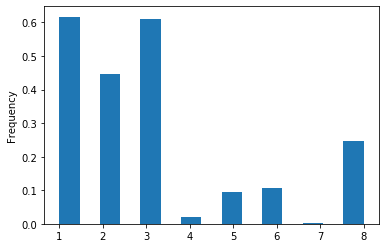

In [11]:
# Looking at the frequency distribution of cigarettes per day bins
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

d_bin = df_smoking1['cigarettes_per_day_bins']
plt.hist(d_bin, normed=True, bins=15)
plt.ylabel('Frequency')

In [12]:
# Train/validate split: random 80/20% train/validate split.
from sklearn.model_selection import train_test_split
XTrain, XVal, yTrain, yVal = train_test_split(df_smoking1.drop('cigarettes_per_day_bins', axis = 1), df_smoking1['cigarettes_per_day_bins'], test_size = 0.2, random_state = 42)

XTrain.shape, yTrain.shape, XVal.shape, yVal.shape

((6081, 91), (6081,), (1521, 91), (1521,))

In [13]:
# Look at correlation coefficients
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
XTrain.corr()

language  cereal_serve_per_month  \
language                            1.000000                0.436982   
cereal_serve_per_month              0.436982                1.000000   
cereal_times_per_month              0.351576                0.760684   
more_than_one_cereal_type          -0.035361               -0.138573   
milk_serve_per_month                0.433675                0.972695   
milk_times_per_month                0.349838                0.769347   
milk_type                          -0.096036               -0.232121   
soda_serve_per_month                0.431958                0.959336   
soda_times_per_month                0.342304                0.734191   
juice_serve_per_month               0.428804                0.956040   
juice_times_per_month               0.332304                0.727421   
coffee_serve_per_month              0.426747                0.951691   
coffee_times_per_month              0.333119                0.801064   
sports_drink_serve_per_month        0.432197                0.957457   
sports_drink_times_per_month        0.359200                0.808602   
fruit_drink_serve_per_month         0.431355                0.952001   
fruit_drink_times_per_month         0.358626                0.798001   
fruit_eat_serve_per_month           0.425964                0.957833   
fruit_eat_times_per_month           0.384347                0.806646   
salad_eat_serve_per_month           0.427673                0.950363   
salad_eat_times_per_month           0.382662                0.789765   
fries_eat_serve_per_month           0.425416                0.950622   
fries_eat_times_per_month           0.361141                0.706499   
potatoe_eat_serve_per_month         0.422435                0.936681   
potatoe_eat_times_per_month         0.375218                0.743602   
beans_eat_serve_per_month           0.421520                0.935026   
beans_eat_times_per_month           0.334060                0.704172   
grains_eat_serve_per_month          0.422670                0.940141   
grains_eat_times_per_month          0.352108                0.698946   
vegies_eat_serve_per_month          0.415677                0.928090   
vegies_eat_times_per_month          0.359752                0.801514   
salsa_eat_serve_per_month           0.421930                0.932706   
salsa_eat_times_per_month           0.332938                0.678452   
pizza_eat_serve_per_month           0.422585                0.938145   
pizza_eat_times_per_month           0.358019                0.679303   
tomatoe_eat_serve_per_month         0.418889                0.930008   
tomatoe_eat_times_per_month         0.360487                0.700663   
cheese_eat_serve_per_month          0.417031                0.926477   
cheese_eat_times_per_month          0.363737                0.769202   
red_meat_eat_serve_per_month        0.419657                0.929806   
red_meat_eat_times_per_month        0.376608                0.780559   
processed_meat_eat_serve_per_month  0.418972                0.928255   
processed_meat_eat_times_per_month  0.373554                0.707912   
bread_eat_serve_per_month           0.417267                0.923150   
bread_eat_times_per_month           0.339279                0.735331   
candy_eat_serve_per_month           0.411998                0.922073   
candy_eat_times_per_month           0.372756                0.707072   
donut_eat_serve_per_month           0.416284                0.926723   
donut_eat_times_per_month           0.334741                0.680731   
cookie_eat_serve_per_month          0.409480                0.912101   
cookie_eat_times_per_month          0.355908                0.682247   
ice_cream_eat_serve_per_month       0.414443                0.918537   
ice_cream_eat_times_per_month       0.350857                0.677407   
pop_corn_eat_serve_per_month        0.415217                0.921843   
pop_corn_eat_times_per_month        0.354492                0.669004   
vita

In [14]:
# Dropping highly corrlated columns
def correlation(dataset, validation_dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    del validation_dataset[colname] # deleting the column from the validation dataset
    
correlation(XTrain, XVal, 0.98)

XTrain.shape
XVal.shape

(1521, 78)

In [15]:
# Begin with baselines for classification. 
# The baseline accuracy, if the majority class is guessed for every prediction?
# option with pandas function:
yTrain.value_counts(normalize=True)

3    0.286466
1    0.285644
2    0.208847
8    0.113633
6    0.049663
5    0.044565
4    0.009702
7    0.001480
Name: cigarettes_per_day_bins, dtype: float64

In [16]:
# option with scikit-learn function
from sklearn.metrics import accuracy_score
y = yTrain
majority_class = y.mode()[0]
y_pred = [majority_class] * len(y)
accuracy_score(y, y_pred)

0.2864660417694458

In [17]:
# Thus, baseline accuracy, if you guessed the majority class for every prediction is 0.286

In [72]:
# Optimizing Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define classifier
forest = RandomForestClassifier(random_state = 1)

# Input
X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

# Parameters to fit
n_estimators = [5, 10, 45, 46, 152, 205, 358, 393, 1000]
max_depth = [3, 5, 7, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 5, 10, 15]
max_leaf_nodes = [None, 10, 52]
max_features = [0.11373956383989692, 0.14621091571560108, 0.17046743865886782, 0.17281968473284381, 0.5545636480509806, 0.6130788778718701, 0.6216883421110927, 0.6843610478580876, 0.840823]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             max_leaf_nodes = max_leaf_nodes,
             max_features = max_features)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 10,
                     scoring='accuracy', return_train_score=True,
                     n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 14580 candidates, totalling 43740 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

In [18]:
# Output best accuracy and best parameters
print('The accuracy achieved with the best parameters = ', gridF.best_score_, '\n')
print('The parameters are:', gridF.best_params_)

NameError: name 'gridF' is not defined

In [19]:
# Use a scikit-learn pipeline to encode categoricals and fit a Random Forest Classifier model.

X_train = XTrain
y_train = yTrain
X_val = XVal
y_val = yVal

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                                   max_features = 0.11373956383989692,
                                   max_leaf_nodes = None,
                                   min_samples_leaf = 1,
                                   min_samples_split = 10,
                                   n_estimators = 205))
pipeline.fit(X_train, y_train)

# Get the model's validation accuracy
ce.OneHotEncoder(use_cat_names=True),
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.398422090729783


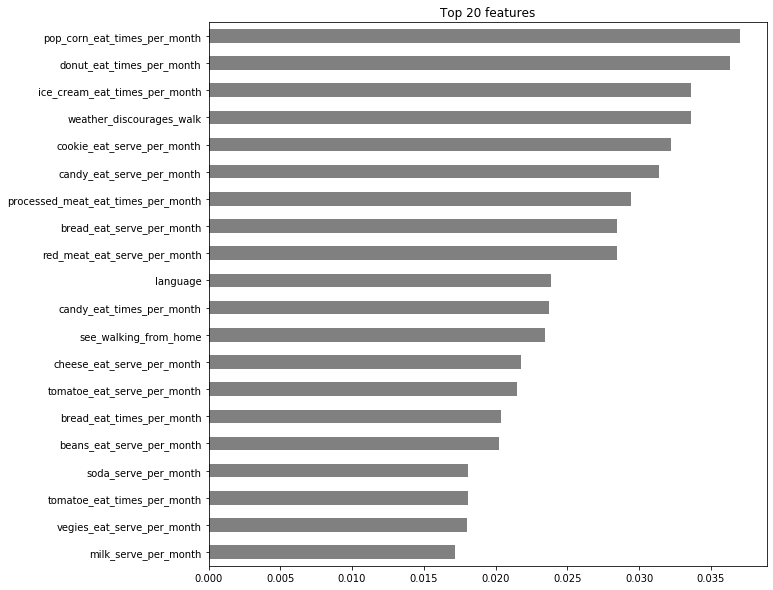

In [20]:
# Plot of features
%matplotlib inline
import matplotlib.pyplot as plt
# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
rf = pipeline.named_steps['randomforestclassifier']
importances1 = pd.Series(rf.feature_importances_, encoded.columns)
# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh(color='grey');

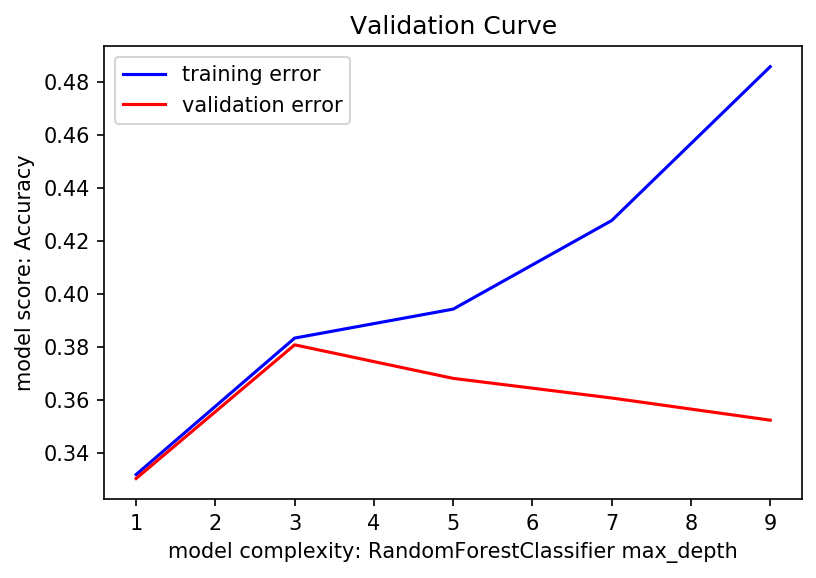

In [21]:
# Generate validation curves
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()
)

depth = range(1, 10, 2)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeclassifier__max_depth',
    param_range=depth, scoring='accuracy',
    cv=3,
    n_jobs=-1
)
    
plt.figure(dpi=150)
plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: RandomForestClassifier max_depth')
plt.ylabel('model score: Accuracy')
plt.legend();

In [22]:
# Tuning the hyper-parameters for a Random Forrest Classifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

param_distributions = {'simpleimputer__strategy': ['mean', 'median', 'most_frequent']}
search = RandomizedSearchCV( pipeline, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', verbose=10, return_train_score=True, n_jobs=-1)

search.fit(X_train, y_train);

C:\Users\ASG\.conda\envs\Lambda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    2.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    2.4s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    5.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    5.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    5.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.0s finished


In [23]:
from sklearn.model_selection import cross_val_score
k = 3
scores = cross_val_score(pipeline, X_val, y_val, cv=k, 
scoring='accuracy')
print(f'Validation Accuracy for {k} folds:', scores);

Validation Accuracy for 3 folds: [0.38235294 0.40631164 0.38690476]


In [24]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean'}
Cross-validation Accuracy 0.3945074823219865


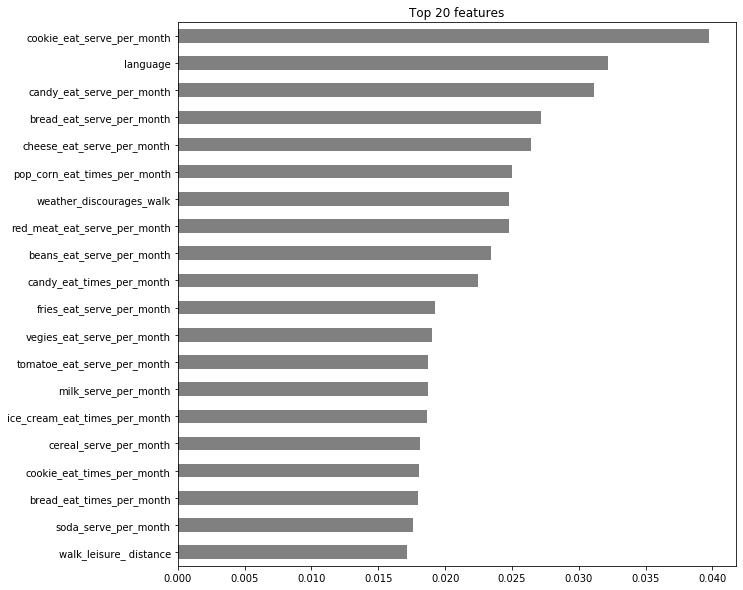

In [25]:
pipeline.fit(X_val, y_val)
# Plot of features
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_val)
rf = pipeline.named_steps['randomforestclassifier']
importances2 = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances2.sort_values()[-n:].plot.barh(color='grey');

In [26]:
# Demonstrate the relatively high cardinatlity of candy_eat_times_per_month 

XTrain['cookie_eat_serve_per_month'].value_counts()

1      1730
0      1502
2      1138
3       507
4       265
998     254
5       185
10      120
15       62
7        58
6        57
20       45
8        33
997      32
30       23
999      20
12       17
25       14
18        5
14        4
9         3
203       1
13        1
28        1
24        1
22        1
16        1
31        1
Name: cookie_eat_serve_per_month, dtype: int64

In [27]:
# Get drop-column importances
column = 'cookie_eat_serve_per_month'

# # Fit without column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without cookie_eat_serve_per_month: 0.40039447731755423
Validation Accuracy with cookie_eat_serve_per_month: 0.398422090729783
Drop-Column Importance for cookie_eat_serve_per_month: -0.0019723865877712132


In [28]:
# Rerun the permutation importance process, but for a different feature
feature = 'language'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy without {feature} permuted: {score_permuted}')
print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy without language permuted: 0.3892176199868508
Validation Accuracy with language: 0.398422090729783
Permutation Importance: 0.009204470742932236


In [29]:
# Using Eli5 library which does not work with pipelines
transformers = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)

model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.11373956383989692,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=205, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [30]:
# Get permutation importances
! pip install eli5
from eli5.sklearn import PermutationImportance
import eli5

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=2,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

In [31]:
# Thus, language is way more important according to feature permutation than according to feature importance in the Random Forrest model
# Use importances for feature selection
print('Shape before removing features:', X_train.shape)

Shape before removing features: (6081, 78)


In [32]:
# Remove features of 0 importance
zero_importance = 0.0003
mask = permuter.feature_importances_ > zero_importance
features = X_train.columns[mask]
X_train = X_train[features]
print('Shape after removing features:', X_train.shape)

Shape after removing features: (6081, 27)


In [33]:
# Random Forest with reduced features to 27
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(random_state = 42, max_depth = 10,
                               max_features = 0.11373956383989692,
                               max_leaf_nodes = None,
                               min_samples_leaf = 1,
                               min_samples_split = 10,
                               n_estimators = 205)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.4076265614727153


In [34]:
# Validation Accuracy History
# 0.2864660417694458– baseline guessing the majority class
# 0.4010853478046374– initial fit with optimal hyperparameters
# 0.398422090729783 - use pipeline with random forest
# 0.3945074823219865– from cross validation
# 0.398422090729783 – doing permutation importance
# 0.4076265614727153– after removing features of zero importance

In [35]:
# Gradient boosting using XGboost
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((6081, 27), (1521, 27), (6081, 27), (1521, 27))

In [54]:
#XGboost with learning_rate=0.25
from xgboost import XGBClassifier

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model = XGBClassifier(          
    random_state = 42, 
    max_depth = 10,
    max_features = 0.11373956383989692,
    max_leaf_nodes = None,
    min_samples_leaf = 1,
    min_samples_split = 10,
    n_estimators = 205,
    learning_rate=0.25,
    n_jobs=-1
)

model.fit(X_train_encoded, y_train, eval_set=eval_set, eval_metric='merror',
    early_stopping_rounds=50)

[0]	validation_0-merror:0.460615	validation_1-merror:0.649573
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.396152	validation_1-merror:0.629849
[2]	validation_0-merror:0.362769	validation_1-merror:0.624589
[3]	validation_0-merror:0.335636	validation_1-merror:0.616042
[4]	validation_0-merror:0.311955	validation_1-merror:0.625904
[5]	validation_0-merror:0.298142	validation_1-merror:0.618672
[6]	validation_0-merror:0.280053	validation_1-merror:0.605523
[7]	validation_0-merror:0.266075	validation_1-merror:0.612755
[8]	validation_0-merror:0.253741	validation_1-merror:0.615385
[9]	validation_0-merror:0.242065	validation_1-merror:0.614727
[10]	validation_0-merror:0.231376	validation_1-merror:0.616042
[11]	validation_0-merror:0.21855	validation_1-merror:0.616042
[12]	validation_0-merror:0.208189	validation_1-merror:0.618672
[13]	validation_0-merror:0.19

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              max_features=0.11373956383989692, max_leaf_nodes=None,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=10,
              missing=None, n_estimators=205, n_jobs=-1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

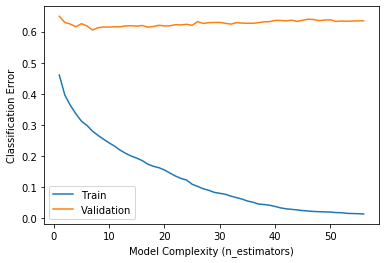

In [55]:
# Plot the results
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.5, 0.7)) # Zoom in
plt.legend();

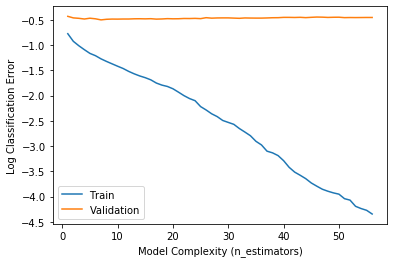

In [56]:
# Plot log classification error versus model complexity
import numpy as np
results = model.evals_result()
log_train_error = np.log(results['validation_0']['merror'])
log_val_error = np.log(results['validation_1']['merror'])
epoch = range(1, len(train_error)+1)
plt.plot(epoch, log_train_error, label='Train')
plt.plot(epoch, log_val_error, label='Validation')
plt.ylabel('Log Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((-0.75, -0.4)) # Zoom in
plt.legend();

In [57]:
# Note the Classification Error is minimum at n_estimators = 6 in the above
# This is best scene when using the Zoom In scaling

#Gradient Boosting R^2
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=46, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.2737135437482129


C:\Users\ASG\.conda\envs\Lambda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [58]:
# Getting the value distribution for the language feature
df_smoking1['language'].value_counts()

5    5713
4    1031
8     213
3     203
1     169
2     138
6     134
9       1
Name: language, dtype: int64

In [59]:
# Define function to vary the language feature while holding all other features constant
import numpy as np

def vary_language(model, example):
    print('Vary language, hold other features constant', '\n')
    example = example.copy()
    preds = []
    for lang in range(1, 9, 1):
        example['language'] = lang
        pred = model.predict(example)[0]
        print(f'Predicted cigarettes_per_day_bin: {pred:.3f}%')
        print(example.to_string(), '\n')
        preds.append(pred)
    print('Difference between predictions')
    print(np.diff(preds))

In [64]:
# Vary the language feature while holding all other features constant for the first row
example1 = X_val.iloc[[0]]
vary_language(gb, example1)

Vary language, hold other features constant 

Predicted cigarettes_per_day_bin: 2.890%
       language  milk_serve_per_month  milk_type  coffee_times_per_month  sports_drink_times_per_month  fruit_eat_times_per_month  fries_eat_serve_per_month  cheese_eat_serve_per_month  cheese_eat_times_per_month  red_meat_eat_serve_per_month  red_meat_eat_times_per_month  bread_eat_serve_per_month  bread_eat_times_per_month  vitamin_past_month  calcium_past_month  vitD_days_in_month  walk_number_wk  single_walk_distance  walk_leisure_number_wk  walk_leisure_ distance  walk_leisure_ time  weather_discourages_walk  walkable_bus_stop  walkable_relaxation  cigarette_even_once  cigar_even_once  smokeless_even_once
31502         1                     3        2.0                       0                             0                          2                          2                           4                           2                             3                             2                       

In [65]:
# Vary the language feature while holding all other features constant for the second row
example2 = X_val.iloc[[2]]
vary_language(gb, example2)

Vary language, hold other features constant 

Predicted cigarettes_per_day_bin: 2.719%
       language  milk_serve_per_month  milk_type  coffee_times_per_month  sports_drink_times_per_month  fruit_eat_times_per_month  fries_eat_serve_per_month  cheese_eat_serve_per_month  cheese_eat_times_per_month  red_meat_eat_serve_per_month  red_meat_eat_times_per_month  bread_eat_serve_per_month  bread_eat_times_per_month  vitamin_past_month  calcium_past_month  vitD_days_in_month  walk_number_wk  single_walk_distance  walk_leisure_number_wk  walk_leisure_ distance  walk_leisure_ time  weather_discourages_walk  walkable_bus_stop  walkable_relaxation  cigarette_even_once  cigar_even_once  smokeless_even_once
27082         1                     2        2.0                       0                             0                          3                          1                           1                           2                             2                             3                       

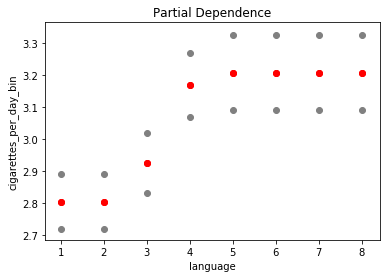

In [66]:
# Plot pair dependency of the language feature for rows 1 and 2 
%matplotlib inline
import matplotlib.pyplot as plt

examples = pd.concat([example1, example2])
for lang in range(1, 9, 1):
    examples['language'] = lang
    preds = gb.predict(examples)
    for pred in preds:
        plt.scatter(lang, pred, color='grey')
        plt.scatter(lang, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('language')
    plt.ylabel('cigarettes_per_day_bin')

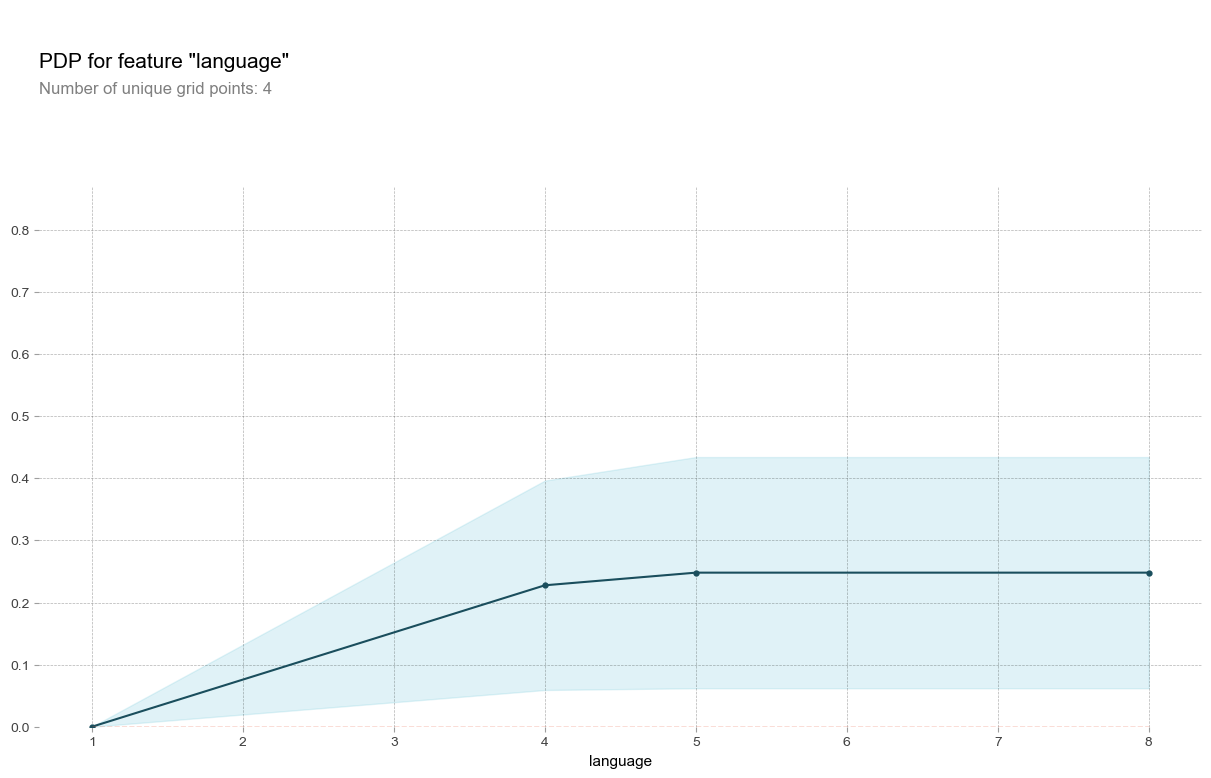

In [67]:
# Create patrial dependence plots with one feature
import matplotlib.pyplot as plt
! pip install PDPbox

# First for the language feature
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'language'
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

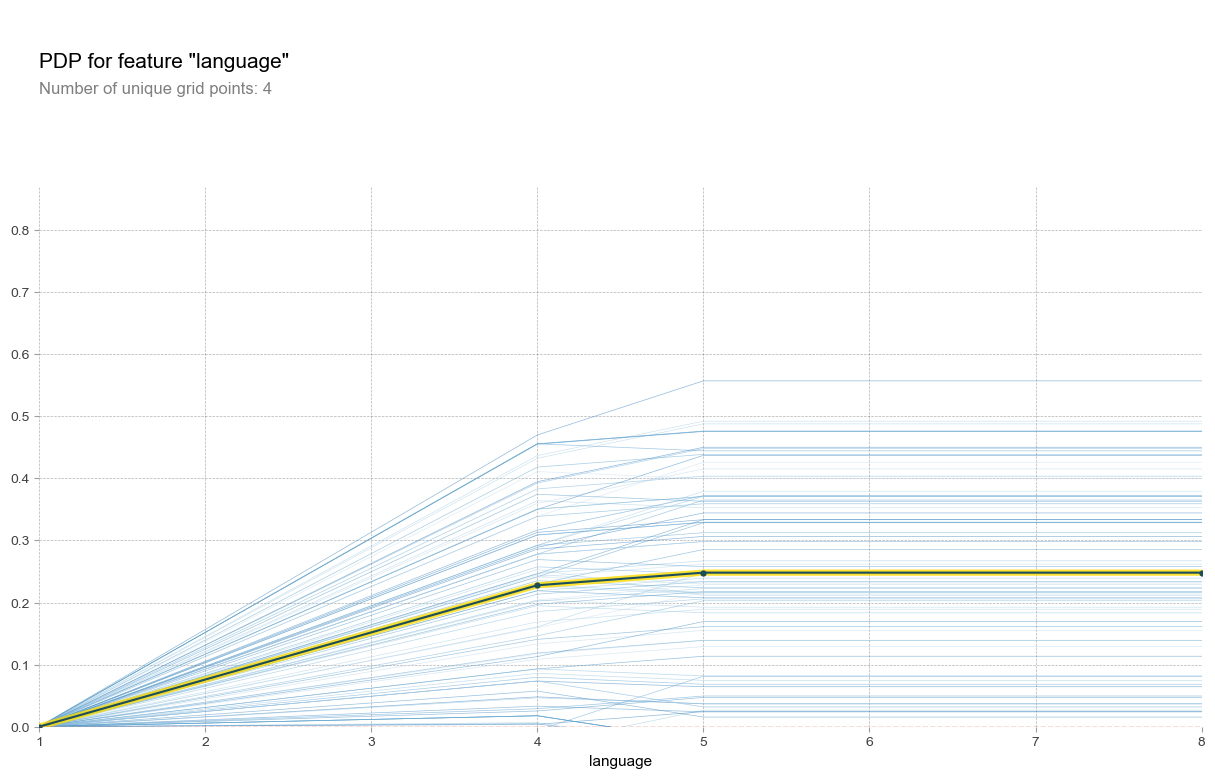

In [68]:
# Plot partial dependence plot with ICE lines for the language feature
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(1,8);

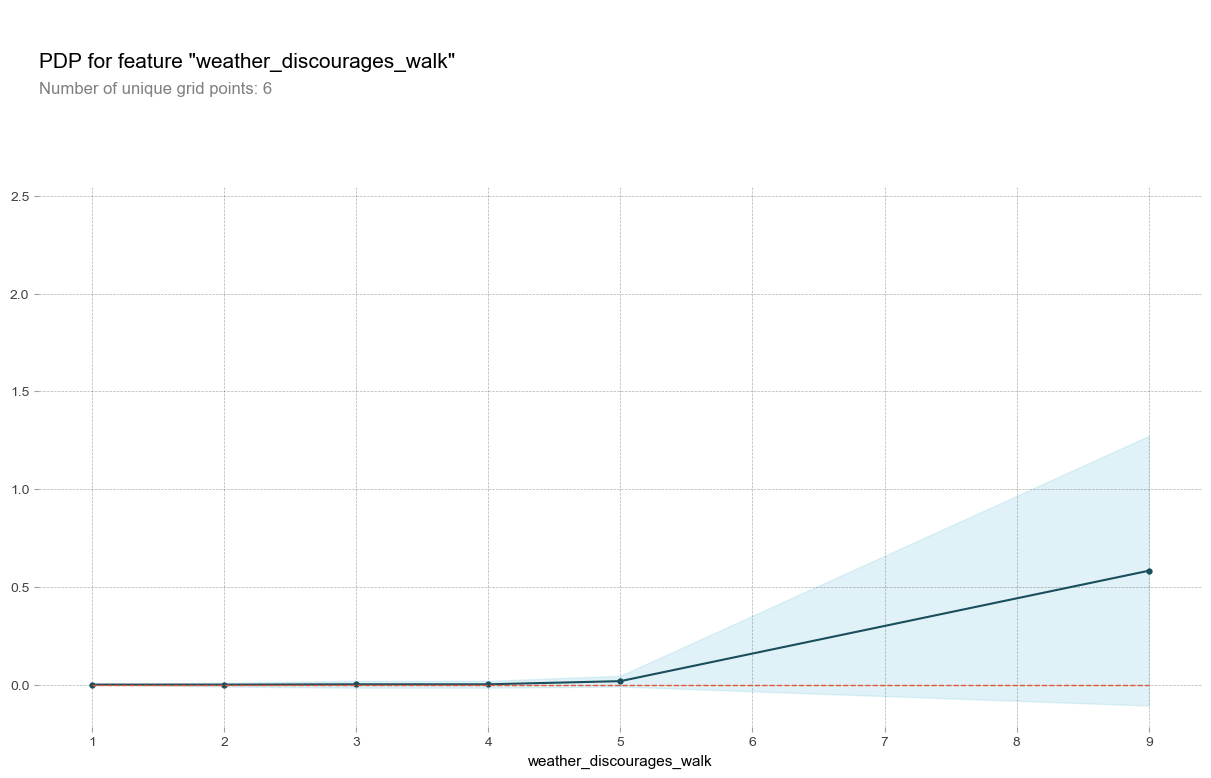

In [69]:
# First for the weather_discourages_walk feature
plt.rcParams['figure.dpi'] = 100
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'weather_discourages_walk'
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

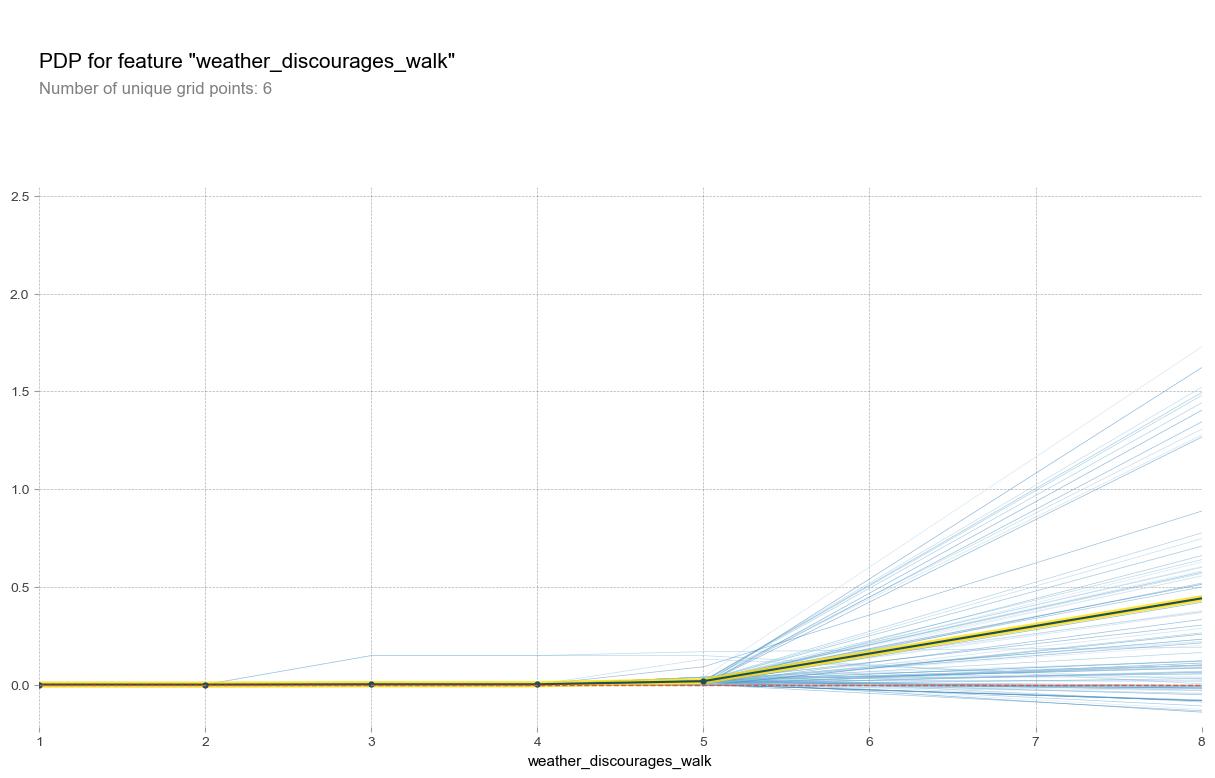

In [70]:
# Plot partial dependence plot with ICE lines for the weather_discourages_walk feature
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(1,8);

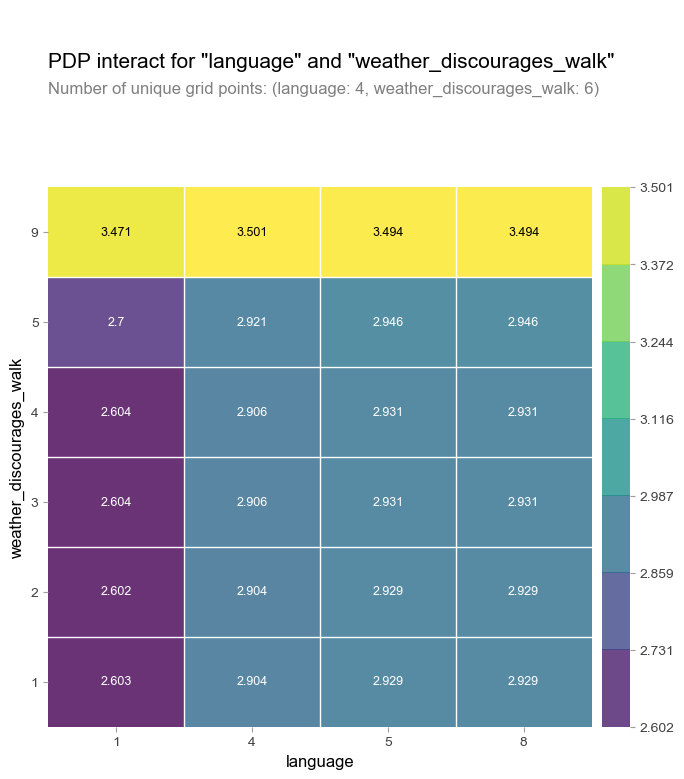

In [71]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['language', 'weather_discourages_walk']
interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [72]:
# A two feature partical dependence plot in 3D
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

import plotly.graph_objs as go

target = 'cigarettes_per_day_bins'

surface = go.Surface(x=pdp.columns,
                     y=pdp.index,
                     z=pdp.values)

layout = go.Layout(
    scene=dict(
    xaxis=dict(title=features[0]),
    yaxis=dict(title=features[1]),
    zaxis=dict(title=target)
    )
)
fig = go.Figure(surface, layout)
fig.show()

In [73]:
# Test ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import category_encoders as ce

processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean')
)

# Note ROC AUC ranges from 0 - 1, the higher the better
X_val_processed = processor.fit_transform(X_val)

In [ ]:
# Contributrions to making bin 1 (1 - 7 cigarettes per day) for sample 170
! pip install shap==0.23.0
! pip install -I shap

import shap

row = X_val.iloc[[170]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values_input = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_input[0],
    features=row
)

In [ ]:
# Contributrions to making bin 8 (49 - 100 cigarettes per day) for sample 170
import shap

row = X_val.iloc[[170]]

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values_input = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[7],
    shap_values=shap_values_input[7],
    features=row
)

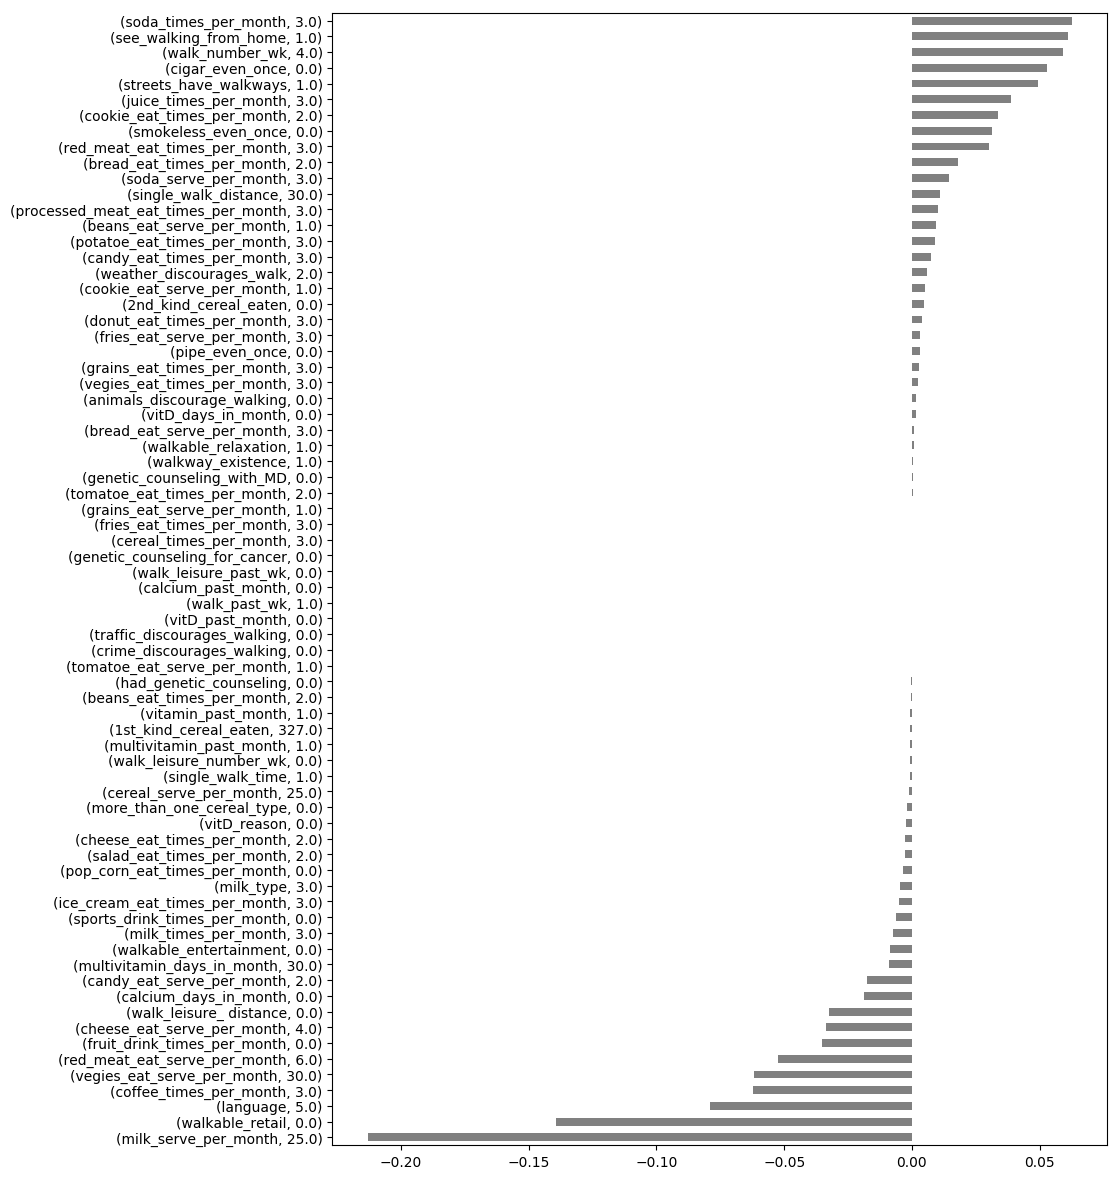

In [0]:
# Featues importances for sample 170

feature_names = row.columns
feature_values = row.values[0]
shap_values_array = np.asarray(shap_values_input)
shaps = pd.Series(shap_values_array[0,0,:], zip(feature_names, feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(10,15));

In [0]:
# Create a dataframe for sample 170
# bin versus feature

my_python_list = [shap_values_array[0, 0, :], shap_values_array[1, 0, :], shap_values_array[2, 0, :], shap_values_array[3, 0, :], shap_values_array[4, 0, :], shap_values_array[5, 0, :], shap_values_array[6, 0, :], shap_values_array[7, 0, :]]
df_bins = pd.DataFrame(columns=np.array(feature_names), data=my_python_list)

df_bins.head(8)

language  cereal_serve_per_month  cereal_times_per_month  \
0 -0.078904               -0.001079                0.000000   
1  0.009190               -0.028916                0.000124   
2  0.038114                0.189786                0.001831   
3 -0.002156                0.002513                0.000000   
4 -0.000780               -0.026380                0.001205   
5 -0.000124                0.035602                0.021127   
6  0.000000                0.000250                0.000000   
7 -0.000721               -0.002467                0.001319   

   more_than_one_cereal_type  milk_serve_per_month  milk_times_per_month  \
0                  -0.001774             -0.213007             -0.007590   
1                   0.000488              0.137537              0.000125   
2                   0.000429              0.065633             -0.011696   
3                  -0.000402              0.008714              0.000000   
4                  -0.000794              0.018316              0.002123   
5                  -0.000245             -0.004743             -0.001539   
6                   0.000000              0.000000              0.000000   
7                   0.000119              0.030396             -0.002267   

   milk_type  soda_serve_per_month  soda_times_per_month  \
0  -0.004505              0.014557              0.062744   
1   0.069780              0.000304             -0.041501   
2   0.006328             -0.022714             -0.006339   
3  -0.000083             -0.004515             -0.018797   
4   0.003152             -0.001053              0.006238   
5  -0.041621             -0.041650              0.000647   
6   0.000000              0.000000              0.000000   
7  -0.002847             -0.000107              0.000000   

   juice_times_per_month  coffee_times_per_month  \
0               0.038819               -0.062255   
1              -0.002245                0.002587   
2               0.000962               -0.011933   
3              -0.000584                0.000000   
4              -0.005293               -0.001718   
5              -0.010827               -0.007953   
6               0.000000                0.000000   
7               0.000000               -0.006808   

   sports_drink_times_per_month  fruit_drink_times_per_month  \
0                     -0.006090                    -0.035197   
1                     -0.009148                    -0.008791   
2                     -0.000401                     0.014335   
3                     -0.000397                    -0.000157   
4                      0.000000                     0.021193   
5                     -0.020150                    -0.001392   
6                      0.000254                     0.000000   
7                      0.000000                     0.000000   

   salad_eat_times_per_month  fries_eat_serve_per_month  \
0                  -0.002777                   0.003234   
1                   0.016345                   0.002030   
2                  -0.009371                  -0.006244   
3                   0.000387                  -0.002131   
4                  -0.000962                  -0.001977   
5                  -0.000858                  -0.004777   
6                   0.000000                   0.000000   
7                  -0.007422                   0.000203   

   fries_eat_times_per_month  potatoe_eat_times_per_month  \
0                   0.000000                     0.008932   
1                  -0.000044                     0.033996   
2                  -0.004690                     0.011979   
3                   0.000000                    -0.009717   
4                  -0.002819                    -0.001642   
5                  -0.000577                     0.003058   
6                   0.000000                     0.000000   
7                  -0.000179                     0.000000   

   beans_eat_serve_per_month  beans_eat_times_per_month  \
0                   0.

In [0]:
# Create a 3D plot of force as a function of cigarettes_per_day_bin and feature for sample 170
# A two feature partical dependence plot in 3D
import plotly.graph_objs as go

surface = go.Surface(x=df_bins.columns,
                     y=df_bins.index + 1,
                     z=df_bins.values)

layout = go.Layout(
    scene=dict(
    xaxis=dict(title= 'Features'),
    yaxis=dict(title= 'cigarettes_per_day_bin'),
    zaxis=dict(title= 'Force')
    )
)
fig = go.Figure(surface, layout)
fig.show()


In [0]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('Pros:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}')
print('\n')

print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}')

Pros:
1. soda_times_per_month is 3.0
2. see_walking_from_home is 1.0
3. walk_number_wk is 4.0


Cons:
1. milk_serve_per_month is 25.0
2. walkable_retail is 0.0
3. language is 5.0


In [0]:
# Create function for constructing confusion matrix
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
    columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

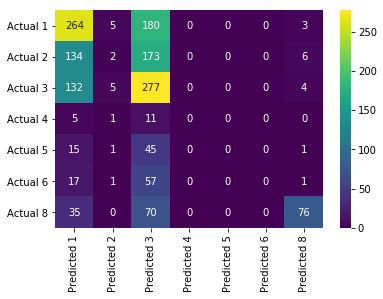

In [0]:
y_pred = pipeline.predict(X_val)
plot_confusion_matrix(y_val, y_pred);

In [0]:
# Get precision & recall for majority class baseline
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.44      0.58      0.50       452
           2       0.13      0.01      0.01       315
           3       0.34      0.66      0.45       418
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        76
           8       0.84      0.42      0.56       181

    accuracy                           0.41      1521
   macro avg       0.25      0.24      0.22      1521
weighted avg       0.35      0.41      0.34      1521



In [0]:
# Another way to get a classification report using an ROC_AUC approach (https://stackoverflow.com/questions/39685740/calculate-sklearn-roc-auc-score-for-multi-class?rq=1), 
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [0]:
# The above function provides the predicted values for each class. 
class_report(y_val, y_pred, y_score=None, average='micro')

precision    recall  f1-score  support    pred
1             0.438538  0.584071  0.500949    452.0   602.0
2             0.133333  0.006349  0.012121    315.0    15.0
3             0.340713  0.662679  0.450041    418.0   813.0
8             0.835165  0.419890  0.558824    181.0    91.0
avg / total   0.350955  0.406969  0.341559   1366.0  1366.0

In [0]:
# Deriving an ROC curve for each class in cigarettes_per_day_bins
# Transform y_val and y_pred to arrays that are 1521 by 8 with bins as the columns

y_val_trans = pd.DataFrame(columns=['1','2','3','4','5','6','7', '8'])
y_val_trans['1']=y_val.map(lambda x : 1 if x==1 else 0)
y_val_trans['2']=y_val.map(lambda x : 1 if x==2 else 0)
y_val_trans['3']=y_val.map(lambda x : 1 if x==3 else 0)
y_val_trans['4']=y_val.map(lambda x : 1 if x==4 else 0)
y_val_trans['5']=y_val.map(lambda x : 1 if x==5 else 0)
y_val_trans['6']=y_val.map(lambda x : 1 if x==6 else 0)
y_val_trans['7']=y_val.map(lambda x : 1 if x==7 else 0)
y_val_trans['8']=y_val.map(lambda x : 1 if x==8 else 0)
print ('y_val_trans =')
print (y_val_trans.head(), '\n')

y_pred_proba = model.predict_proba(X_val)

y_pred_trans = pd.DataFrame(y_pred_proba)

print ('y_pred_trans')
print (y_pred_trans.head(), '\n')

y_val_trans =
       1  2  3  4  5  6  7  8
31502  0  0  1  0  0  0  0  0
4439   1  0  0  0  0  0  0  0
27082  0  1  0  0  0  0  0  0
19317  0  1  0  0  0  0  0  0
2063   0  0  0  0  1  0  0  0 

y_pred_trans
          0         1         2         3         4         5         6  \
0  0.134439  0.211467  0.243504  0.060497  0.109879  0.090755  0.056505   
1  0.230874  0.172901  0.206736  0.056917  0.087410  0.071219  0.055634   
2  0.192338  0.205295  0.260232  0.056505  0.080505  0.059474  0.054726   
3  0.042977  0.071380  0.093560  0.043139  0.043097  0.042417  0.042513   
4  0.234252  0.118815  0.181867  0.055755  0.112610  0.161509  0.052913   

          7  
0  0.092955  
1  0.118309  
2  0.090925  
3  0.620918  
4  0.082279   



In [0]:
# Learn to predict each class against the other
print(__doc__)

import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_val_trans.iloc[:, i], y_pred_trans.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_trans.values.ravel(), y_pred_trans.values.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


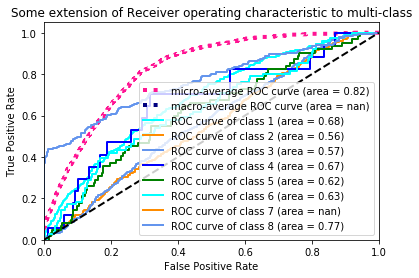

In [0]:
# Compute macro-average ROC curve and ROC area
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
n_classes = 8
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()